In [ ]:
Урок 12-1
Polars: работа с несколькими
таблицами

In [2]:
import polars as pl
import numpy as np

In [3]:
# Create a random seed for reproducibility
np.random.seed(42)
# Dataset 1: User information
data1 = {
'user_id': np.arange(1, 101),
'name': np.random.choice(['Alice', 'Bob', 'Charlie', 'David'], 100)
}
df1 = pl.DataFrame(data1)
# Dataset 2: User age information
data2 = {
'user_id': np.arange(51, 151),
'age': np.random.randint(18, 65, size=100)
}
df2 = pl.DataFrame(data2)
# Dataset 3: User scores
data3 = {
'user_id': np.random.randint(1, 101, size=100),
'score': np.random.randint(200, 1000, size=100)
}
df3 = pl.DataFrame(data3)
df3

user_id,score
i32,i32
62,672
57,350
6,614
28,497
28,810
…,…
82,944
1,236
11,479


In [ ]:
1. Inner Join: Возвращает строки, которые имеют совпадающие значения в обеих
таблицах. Этот тип объединения используется, когда вы хотите получить только те
записи, которые имеют соответствующие записи в обоих объединяемых DataFrames.

In [13]:
inner_joined_df = df1.join(df2, on='user_id', how='inner')
print("Inner Join Result:\n", inner_joined_df)


Inner Join Result:
 shape: (50, 3)
┌─────────┬─────────┬─────┐
│ user_id ┆ name    ┆ age │
│ ---     ┆ ---     ┆ --- │
│ i64     ┆ str     ┆ i32 │
╞═════════╪═════════╪═════╡
│ 51      ┆ Charlie ┆ 35  │
│ 52      ┆ Bob     ┆ 43  │
│ 53      ┆ Charlie ┆ 61  │
│ 54      ┆ David   ┆ 51  │
│ 55      ┆ Charlie ┆ 27  │
│ …       ┆ …       ┆ …   │
│ 96      ┆ Bob     ┆ 45  │
│ 97      ┆ Bob     ┆ 24  │
│ 98      ┆ David   ┆ 26  │
│ 99      ┆ Bob     ┆ 25  │
│ 100     ┆ Alice   ┆ 29  │
└─────────┴─────────┴─────┘


In [ ]:
2. Left Join: Возвращает все строки из левой таблицы и совпадающие строки из
правой таблицы. Если совпадений нет, результатом будет `NULL` на стороне правой
таблицы.


In [12]:
left_joined_df = df1.join(df2, on='user_id', how='left')
print("Left Join Result:\n", left_joined_df)

Left Join Result:
 shape: (100, 3)
┌─────────┬─────────┬──────┐
│ user_id ┆ name    ┆ age  │
│ ---     ┆ ---     ┆ ---  │
│ i64     ┆ str     ┆ i32  │
╞═════════╪═════════╪══════╡
│ 1       ┆ Charlie ┆ null │
│ 2       ┆ David   ┆ null │
│ 3       ┆ Alice   ┆ null │
│ 4       ┆ Charlie ┆ null │
│ 5       ┆ Charlie ┆ null │
│ …       ┆ …       ┆ …    │
│ 96      ┆ Bob     ┆ 45   │
│ 97      ┆ Bob     ┆ 24   │
│ 98      ┆ David   ┆ 26   │
│ 99      ┆ Bob     ┆ 25   │
│ 100     ┆ Alice   ┆ 29   │
└─────────┴─────────┴──────┘


In [ ]:
3. Outer Join: Также известное как полное внешнее соединение, оно возвращает все
строки из левой и правой таблиц. Если совпадений нет, результатом будет `NULL` на
стороне таблицы без совпадений. Он заполняет недостающие значения в столбцах
соединения.


In [11]:
full_outer_joined_df = df1.join(df2, on='user_id', how='full') #outer будет заменен на full,т.к. не будет поддерживаться
print("Full Outer Join Result:\n", full_outer_joined_df)

Full Outer Join Result:
 shape: (150, 4)
┌─────────┬─────────┬───────────────┬──────┐
│ user_id ┆ name    ┆ user_id_right ┆ age  │
│ ---     ┆ ---     ┆ ---           ┆ ---  │
│ i64     ┆ str     ┆ i64           ┆ i32  │
╞═════════╪═════════╪═══════════════╪══════╡
│ 51      ┆ Charlie ┆ 51            ┆ 35   │
│ 52      ┆ Bob     ┆ 52            ┆ 43   │
│ 53      ┆ Charlie ┆ 53            ┆ 61   │
│ 54      ┆ David   ┆ 54            ┆ 51   │
│ 55      ┆ Charlie ┆ 55            ┆ 27   │
│ …       ┆ …       ┆ …             ┆ …    │
│ 10      ┆ Bob     ┆ null          ┆ null │
│ 13      ┆ Charlie ┆ null          ┆ null │
│ 36      ┆ Alice   ┆ null          ┆ null │
│ 27      ┆ Bob     ┆ null          ┆ null │
│ 21      ┆ Bob     ┆ null          ┆ null │
└─────────┴─────────┴───────────────┴──────┘


In [ ]:
4. Cross Join: Получает декартово произведение двух таблиц. Это означает, что
каждая строка первой таблицы объединяется со всеми строками второй таблицы.

In [8]:
df_brands = pl.DataFrame({
'brand': ['lacoste', 'prada', 'calvin klein']
})
df_sizes = pl.DataFrame({
'sizes': ['S', 'M', 'L']
})
cross_joined_df = df_brands.join(df_sizes, how='cross')
print("Cross Join Result (first 5 rows):\n", cross_joined_df)

Cross Join Result (first 5 rows):
 shape: (9, 2)
┌──────────────┬───────┐
│ brand        ┆ sizes │
│ ---          ┆ ---   │
│ str          ┆ str   │
╞══════════════╪═══════╡
│ lacoste      ┆ S     │
│ lacoste      ┆ M     │
│ lacoste      ┆ L     │
│ prada        ┆ S     │
│ prada        ┆ M     │
│ prada        ┆ L     │
│ calvin klein ┆ S     │
│ calvin klein ┆ M     │
│ calvin klein ┆ L     │
└──────────────┴───────┘


In [ ]:
5. Semi Join: Возвращает все строки из левой таблицы, для которых есть
совпадающие ключи в правой таблице, но не включает ни одного столбца из правой
таблицы. Это эффективно фильтрует левую таблицу на основе наличия ключей в
правой таблице.


In [9]:
semi_joined_df = df1.join(df2, on='user_id', how='semi')
print(f"Semi Join Result {semi_joined_df.shape}:\n", semi_joined_df)


Semi Join Result (50, 2):
 shape: (50, 2)
┌─────────┬─────────┐
│ user_id ┆ name    │
│ ---     ┆ ---     │
│ i64     ┆ str     │
╞═════════╪═════════╡
│ 51      ┆ Charlie │
│ 52      ┆ Bob     │
│ 53      ┆ Charlie │
│ 54      ┆ David   │
│ 55      ┆ Charlie │
│ …       ┆ …       │
│ 96      ┆ Bob     │
│ 97      ┆ Bob     │
│ 98      ┆ David   │
│ 99      ┆ Bob     │
│ 100     ┆ Alice   │
└─────────┴─────────┘


In [ ]:
6. Anti Join: Возвращает все строки из левой таблицы, для которых нет совпадающих
ключей в правой таблице. Это полезно для поиска расхождений или исключений
между двумя наборами данных.


In [14]:
anti_joined_df = df1.join(df2, on='user_id', how='anti') # те, у кого не заполнен age (null)
print(f"Anti Join Result {anti_joined_df.shape}:\n", anti_joined_df)

Anti Join Result (50, 2):
 shape: (50, 2)
┌─────────┬─────────┐
│ user_id ┆ name    │
│ ---     ┆ ---     │
│ i64     ┆ str     │
╞═════════╪═════════╡
│ 1       ┆ Charlie │
│ 2       ┆ David   │
│ 3       ┆ Alice   │
│ 4       ┆ Charlie │
│ 5       ┆ Charlie │
│ …       ┆ …       │
│ 46      ┆ David   │
│ 47      ┆ David   │
│ 48      ┆ Charlie │
│ 49      ┆ Bob     │
│ 50      ┆ Bob     │
└─────────┴─────────┘


In [ ]:
Соединение asof в Polars - это специализированный тип операции
соединения, предназначенный в первую очередь для данных временных рядов,
где целью является объединение двух наборов данных на основе ближайшего
ключа, а не точного совпадения

In [15]:
df_q = pl.DataFrame({
"time": ["2024-01-01 10:00", "2024-01-01 10:02", "2024-01-01 10:05"],
"quantity": [10, 20, 30]
}).with_columns(pl.col("time").str.strptime(pl.Datetime)).sort('time') #вместо strptime можно использовать to_datetime
df_p = pl.DataFrame({
"time": ["2024-01-01 10:01", "2024-01-01 10:03", "2024-01-01 10:06"],
"price": [100, 200, 300]
}).with_columns(pl.col("time").str.strptime(pl.Datetime)).sort('time')
# Выполнение объединения по принципу asof
result = df_q.join_asof(df_p, on="time") #по умолчанию backword
print(result)

shape: (3, 3)
┌─────────────────────┬──────────┬───────┐
│ time                ┆ quantity ┆ price │
│ ---                 ┆ ---      ┆ ---   │
│ datetime[μs]        ┆ i64      ┆ i64   │
╞═════════════════════╪══════════╪═══════╡
│ 2024-01-01 10:00:00 ┆ 10       ┆ null  │
│ 2024-01-01 10:02:00 ┆ 20       ┆ 100   │
│ 2024-01-01 10:05:00 ┆ 30       ┆ 200   │
└─────────────────────┴──────────┴───────┘


In [19]:
df_q = pl.DataFrame({
"time": ["2024-01-01 10:00", "2024-01-01 10:02", "2024-01-01 10:05"],
"quantity": [10, 20, 30]
}).with_columns(pl.col("time").str.strptime(pl.Datetime)).sort('time') #вместо strptime можно использовать to_datetime
df_p = pl.DataFrame({
"time": ["2024-01-01 10:01", "2024-01-01 10:03", "2024-01-01 10:04"],
"price": [100, 200, 300]
}).with_columns(pl.col("time").str.strptime(pl.Datetime)).sort('time')
# Выполнение объединения по принципу asof
result = df_q.join_asof(df_p, on="time", strategy='forward') #по умолчанию backword
print(result)

shape: (3, 3)
┌─────────────────────┬──────────┬───────┐
│ time                ┆ quantity ┆ price │
│ ---                 ┆ ---      ┆ ---   │
│ datetime[μs]        ┆ i64      ┆ i64   │
╞═════════════════════╪══════════╪═══════╡
│ 2024-01-01 10:00:00 ┆ 10       ┆ 100   │
│ 2024-01-01 10:02:00 ┆ 20       ┆ 200   │
│ 2024-01-01 10:05:00 ┆ 30       ┆ null  │
└─────────────────────┴──────────┴───────┘


In [18]:
df_q = pl.DataFrame({
"time": ["2024-01-01 10:00", "2024-01-01 10:02", "2024-01-01 10:05"],
"quantity": [10, 20, 30]
}).with_columns(pl.col("time").str.strptime(pl.Datetime)).sort('time') #вместо strptime можно использовать to_datetime
df_p = pl.DataFrame({
"time": ["2024-01-01 10:01", "2024-01-01 10:03", "2024-01-01 10:06"],
"price": [100, 200, 300]
}).with_columns(pl.col("time").str.strptime(pl.Datetime)).sort('time')
# Выполнение объединения по принципу asof
result = df_q.join_asof(df_p, on="time", strategy='nearest') #по умолчанию backword
print(result)

shape: (3, 3)
┌─────────────────────┬──────────┬───────┐
│ time                ┆ quantity ┆ price │
│ ---                 ┆ ---      ┆ ---   │
│ datetime[μs]        ┆ i64      ┆ i64   │
╞═════════════════════╪══════════╪═══════╡
│ 2024-01-01 10:00:00 ┆ 10       ┆ 100   │
│ 2024-01-01 10:02:00 ┆ 20       ┆ 200   │
│ 2024-01-01 10:05:00 ┆ 30       ┆ 300   │
└─────────────────────┴──────────┴───────┘


In [ ]:
tolerance - это важная функция, которая позволяет
указать предел расстояния между ключами
объединения, чтобы строки считались
совпадающими.

In [24]:
from datetime import timedelta

df_q = pl.DataFrame({
"time": ["2024-01-01 10:00", "2024-01-01 10:02", "2024-01-01 10:05"],
"quantity": [10, 20, 30]
}).with_columns(pl.col("time").str.strptime(pl.Datetime)).sort('time') #вместо strptime можно использовать to_datetime
df_p = pl.DataFrame({
"time": ["2024-01-01 10:01", "2024-01-01 10:03", "2024-01-01 10:07"],
"price": [100, 200, 300]
}).with_columns(pl.col("time").str.strptime(pl.Datetime)).sort('time')

# Выполняем объединение asof с допуском 1 минута
result = df_q .join_asof(df_p, on='time', tolerance=timedelta(minutes=1), strategy='forward')
print(result)

shape: (3, 3)
┌─────────────────────┬──────────┬───────┐
│ time                ┆ quantity ┆ price │
│ ---                 ┆ ---      ┆ ---   │
│ datetime[μs]        ┆ i64      ┆ i64   │
╞═════════════════════╪══════════╪═══════╡
│ 2024-01-01 10:00:00 ┆ 10       ┆ 100   │
│ 2024-01-01 10:02:00 ┆ 20       ┆ 200   │
│ 2024-01-01 10:05:00 ┆ 30       ┆ null  │
└─────────────────────┴──────────┴───────┘


In [ ]:
Merge_sorted -это специализированный метод,
предназначенный для объединения двух уже
отсортированных DataFrame на основе
указанного ключа, гарантируя, что
результирующий DataFrame останется
отсортированным. 

In [25]:
df11 = pl.DataFrame({
 "Name": ["John", "Joseph", "Albert"],
 "Age": [18, 15, 29]
}).sort("Age")
df12 = pl.DataFrame({
 "Name": ["Ema", "Andrew", "Michel"],
 "Age": [22, 30, 16]
}).sort("Age")
df13 = df11.merge_sorted(df12, "Age")
print(df13)

shape: (6, 2)
┌────────┬─────┐
│ Name   ┆ Age │
│ ---    ┆ --- │
│ str    ┆ i64 │
╞════════╪═════╡
│ Joseph ┆ 15  │
│ Michel ┆ 16  │
│ John   ┆ 18  │
│ Ema    ┆ 22  │
│ Albert ┆ 29  │
│ Andrew ┆ 30  │
└────────┴─────┘


In [ ]:
Конкатенация
Это операция, которая используется для
объединения DataFrames или Series как по
вертикали (укладывая их друг на друга), так и по
горизонтали (растягивая их по сторонам).

In [ ]:
Вертикальная
конкатенация
Это операция, которая объединяет фреймы
DataFrames, складывая их друг на друга.

In [26]:
df21 = pl.DataFrame({
 "Name": ["Alice", "Bob"],
 "Age": [25, 30]
})
df22 = pl.DataFrame({
 "Name": ["Charlie", "David"],
 "Age": [35, 40]
})
df_vertical = pl.concat([df21, df22])
print(df_vertical)


shape: (4, 2)
┌─────────┬─────┐
│ Name    ┆ Age │
│ ---     ┆ --- │
│ str     ┆ i64 │
╞═════════╪═════╡
│ Alice   ┆ 25  │
│ Bob     ┆ 30  │
│ Charlie ┆ 35  │
│ David   ┆ 40  │
└─────────┴─────┘


In [ ]:
Горизонтальная
конкатенация
Это операция, которая объединяет фреймы
DataFrames, растягивая их рядом друг с другом.

In [27]:
df23 = pl.DataFrame({
 "City": ["New York", "Los Angeles"],
 "Occupation": ["Engineer", "Doctor"]
})
df_horizontal = pl.concat([df21, df23],
how="horizontal")
print(df_horizontal)

shape: (2, 4)
┌───────┬─────┬─────────────┬────────────┐
│ Name  ┆ Age ┆ City        ┆ Occupation │
│ ---   ┆ --- ┆ ---         ┆ ---        │
│ str   ┆ i64 ┆ str         ┆ str        │
╞═══════╪═════╪═════════════╪════════════╡
│ Alice ┆ 25  ┆ New York    ┆ Engineer   │
│ Bob   ┆ 30  ┆ Los Angeles ┆ Doctor     │
└───────┴─────┴─────────────┴────────────┘


In [ ]:
Диагональная
конкатенация
Это мощный метод объединения DataFrames,
которые могут иметь разные схемы. Эта
операция не только добавляет записи из
нескольких DataFrames, но и управляет
различными столбцами, вводя нулевые
значения там, где данные отсутствуют в
исходных DataFrames.

In [ ]:
df_diagonal = pl.concat(
 [
 df21,
 df23,
 ],
 how="diagonal",
)
print(df_diagonal)


In [ ]:
Если вы не хотите, чтобы Polars повторно копировал конкатенированный DataFrame,
укажите rechunk = False при выполнении конкатенации

In [ ]:
Melt
Это функция, используемая для преобразования
DataFrame из широкого формата в длинный.
Разворачивает DataFrame, превращая столбцы в
строки.

In [31]:
df = pl.DataFrame({
 "Year": [2020, 2021],
 "Product A": [100, 150],
 "Product B": [90, 120]
})
display(df)
melted_df = df.unpivot(index="Year", #unpivot теперь используется вместо melt
on=["Product A", "Product B"],
variable_name="Product",
value_name="Sales")
print(melted_df)


Year,Product A,Product B
i64,i64,i64
2020,100,90
2021,150,120


shape: (4, 3)
┌──────┬───────────┬───────┐
│ Year ┆ Product   ┆ Sales │
│ ---  ┆ ---       ┆ ---   │
│ i64  ┆ str       ┆ i64   │
╞══════╪═══════════╪═══════╡
│ 2020 ┆ Product A ┆ 100   │
│ 2021 ┆ Product A ┆ 150   │
│ 2020 ┆ Product B ┆ 90    │
│ 2021 ┆ Product B ┆ 120   │
└──────┴───────────┴───────┘


In [34]:
df_employees = pl.DataFrame({
 "employee_id": [1, 2, 3, 4],
 "name": ["Alice", "Bob", "Charlie", "David"],
 "department_id": [101, 102, 103, 101]
})
df_departments = pl.DataFrame({
 "department_id": [101, 102, 104],
 "department_name": ["HR", "IT", "Finance"]
})
result = df_employees.join(df_departments, on="department_id", how="left")
print(result)

shape: (4, 4)
┌─────────────┬─────────┬───────────────┬─────────────────┐
│ employee_id ┆ name    ┆ department_id ┆ department_name │
│ ---         ┆ ---     ┆ ---           ┆ ---             │
│ i64         ┆ str     ┆ i64           ┆ str             │
╞═════════════╪═════════╪═══════════════╪═════════════════╡
│ 1           ┆ Alice   ┆ 101           ┆ HR              │
│ 2           ┆ Bob     ┆ 102           ┆ IT              │
│ 3           ┆ Charlie ┆ 103           ┆ null            │
│ 4           ┆ David   ┆ 101           ┆ HR              │
└─────────────┴─────────┴───────────────┴─────────────────┘


In [35]:
df_students = pl.DataFrame({
    "student_id": [1, 2, 3],
    "student_name": ["Alice", "Bob", "Charlie"]
})

df_grades = pl.DataFrame({
    "id": [1, 2, 4],
    "grade": ["A", "B", "C"]
})

result = df_students.join(df_grades, left_on="student_id", right_on="id", how="inner")
result

student_id,student_name,grade
i64,str,str
1,"""Alice""","""A"""
2,"""Bob""","""B"""


In [ ]:
Урок 12-2
Polars: бенчмарки и LazyFrame

In [ ]:
Ленивые вычисления - это вычислительная стратегия, которая откладывает
вычисление выражений до тех пор, пока не понадобятся их значения.

In [ ]:
LazyFrame - это структура данных в Polars, которая представляет собой
отложенные вычисления или серию преобразований, применяемых к набору
данных.

In [ ]:
collect
Это метод, который является важнейшим
компонентом работы с объектами LazyFrame,
особенно при работе с большими наборами
данных или потоковыми данными. Используется
для выполнения запланированных операций над
LazyFrame и сбора результатов в ожидающий
вычислений DataFrame. 

In [36]:
df = pl.DataFrame({
"name": ["Alice", "Bob", "Charlie"],
"age": [25, 30, 35],
"city": ["New York", "Los Angeles", "Chicago"]
})
lazy_df = df.lazy()
lazy_df

In [37]:
lazy_df_from_csv = pl.read_csv("events.csv").lazy()
lazy_df_from_csv 

In [38]:
lazy_df_from_scratch = pl.DataFrame({
"id": [1, 2, 3],
"value": [10, 20, 30]
}).lazy()

In [40]:
lazy_df_from_csv_scan = pl.scan_csv("events.csv") #не читает csv, а готовится к его чтению, файл в память не загружается
# lazy_df_from_parquet_scan = pl.scan_parquet("very_large_dataset.parquet")

In [42]:
result_df = lazy_df_from_csv_scan.collect()#возвращает обычный датафрейм, не lazy
result_df

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2020-09-24 11:57:06 UTC""","""view""",1996170,2144415922528452715,"""electronics.telephone""",null,31.9,1515915625519388267,"""LJuJVLEjPT"""
"""2020-09-24 11:57:26 UTC""","""view""",139905,2144415926932472027,"""computers.components.cooler""","""zalman""",17.16,1515915625519380411,"""tdicluNnRY"""
"""2020-09-24 11:57:27 UTC""","""view""",215454,2144415927158964449,null,null,9.81,1515915625513238515,"""4TMArHtXQy"""
"""2020-09-24 11:57:33 UTC""","""view""",635807,2144415923107266682,"""computers.peripherals.printer""","""pantum""",113.81,1515915625519014356,"""aGFYrNgC08"""
"""2020-09-24 11:57:36 UTC""","""view""",3658723,2144415921169498184,null,"""cameronsino""",15.87,1515915625510743344,"""aa4mmk0kwQ"""
…,…,…,…,…,…,…,…,…
"""2021-02-28 23:55:01 UTC""","""view""",953226,2144415927553229037,null,null,219.94,1515915625611023730,"""FRLqIttxKU"""
"""2021-02-28 23:58:05 UTC""","""view""",1715907,2144415927049912542,"""electronics.video.tv""","""starwind""",80.03,1515915625611024014,"""g6WqPf50Ma"""
"""2021-02-28 23:58:09 UTC""","""view""",4170534,2144415939364389423,"""electronics.clocks""","""amazfit""",64.92,1515915625611024020,"""xNIJBqZdkd"""


In [43]:
result_df = (
    pl.scan_csv("events.csv")
    .select(['brand', 'event_type', 'price'])
    .filter(pl.col('event_type') == 'view')
    .group_by("brand").agg([pl.col("price").mean().alias("average_price")])
).collect() #collect выполняет отсканированный датафрейм и все действия, что были заданы для него (аналог кнопки Run)
print(result_df)

shape: (1_000, 2)
┌─────────────┬───────────────┐
│ brand       ┆ average_price │
│ ---         ┆ ---           │
│ str         ┆ f64           │
╞═════════════╪═══════════════╡
│ kraftool    ┆ 41.271081     │
│ mastech     ┆ 39.987097     │
│ sapphire    ┆ 298.241557    │
│ qcyber      ┆ 38.342129     │
│ aosenma     ┆ 43.170667     │
│ …           ┆ …             │
│ holder      ┆ 31.466232     │
│ h-tek       ┆ 43.14         │
│ adaptec     ┆ 232.387143    │
│ toshiba     ┆ 94.383039     │
│ silverstone ┆ 36.066667     │
└─────────────┴───────────────┘


In [ ]:
План выполнения в Polars - это представление последовательности операций
(таких как select, filter, group by и aggregate), которые планируется выполнить над
набором данных.

In [ ]:
Вычислительный граф
Описывает зависимости между операциями и
порядок их выполнения. Визуализация графа
может дать ценные сведения об эффективности
и структуре конвейера обработки данных.

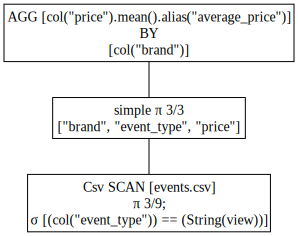

In [3]:
result_df = (
    pl.scan_csv("events.csv")
    .select(['brand', 'event_type', 'price'])
    .filter(pl.col('event_type') == 'view')
    .group_by("brand").agg([pl.col("price").mean().alias("average_price")])
).show_graph() #показывает, КАК будет выполняться план

In [13]:
lazy_df = pl.scan_csv("events.csv").filter(pl.col("price") > 100)
result_df = lazy_df.collect(engine='auto')
result_df

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2020-09-24 11:57:33 UTC""","""view""",635807,2144415923107266682,"""computers.peripherals.printer""","""pantum""",113.81,1515915625519014356,"""aGFYrNgC08"""
"""2020-09-24 11:58:23 UTC""","""view""",3791349,2144415935086199225,"""computers.desktop""",null,215.41,1515915625519388877,"""J1t6sIYXiV"""
"""2020-09-24 12:00:00 UTC""","""view""",1080093,2144415923107266682,"""computers.peripherals.printer""","""ricoh""",268.17,1515915625519389483,"""63xjTFC54g"""
"""2020-09-24 12:00:01 UTC""","""view""",1455459,2144415927049912542,"""electronics.video.tv""","""sony""",635.63,1515915625519385419,"""sF2S2yMO09"""
"""2020-09-24 12:00:39 UTC""","""view""",1021484,2144415944976368325,null,null,202.98,1515915625519389101,"""fO4BG6BTMi"""
…,…,…,…,…,…,…,…,…
"""2021-02-28 23:47:49 UTC""","""view""",1271549,2144415924424278172,"""electronics.audio.acoustic""","""edifier""",405.65,1515915625611022987,"""7geq5gYdXF"""
"""2021-02-28 23:51:25 UTC""","""view""",622796,2144415922738167921,"""computers.components.cdrw""","""asus""",147.38,1515915625572947504,"""LJ4H6CRcME"""
"""2021-02-28 23:51:25 UTC""","""view""",622796,2144415922738167921,"""computers.components.cdrw""","""asus""",147.38,1515915625572947504,"""SqlXaC3Wrw"""


In [10]:
?lazy_df.collect

Signature:
lazy_df.collect(
    *,
    type_coercion: 'bool' = True,
    _type_check: 'bool' = True,
    predicate_pushdown: 'bool' = True,
    projection_pushdown: 'bool' = True,
    simplify_expression: 'bool' = True,
    slice_pushdown: 'bool' = True,
    comm_subplan_elim: 'bool' = True,
    comm_subexpr_elim: 'bool' = True,
    cluster_with_columns: 'bool' = True,
    collapse_joins: 'bool' = True,
    no_optimization: 'bool' = False,
    engine: 'EngineType' = 'auto',
    background: 'bool' = False,
    _check_order: 'bool' = True,
    _eager: 'bool' = False,
    **_kwargs: 'Any',
) -> 'DataFrame | InProcessQuery'
Docstring:
Materialize this LazyFrame into a DataFrame.

By default, all query optimizations are enabled. Individual optimizations may
be disabled by setting the corresponding parameter to `False`.

Parameters
----------
type_coercion
    Do type coercion optimization.
predicate_pushdown
    Do predicate pushdown optimization.
projection_pushdown
    Do projection pushd

In [20]:
import timeit


In [22]:
  # PANDAS

%%timeit
import pandas as pd

df = pd.read_csv("events.csv")
df_selected = df[['brand', 'event_type','price']]
df_filtered = df_selected[df_selected['event_type'] == 'view']
result_df = df_filtered.groupby('brand')['price'].mean().rese
t_index(name='average_price')
print(result_df)

UsageError: Line magic function `%%timeit` not found.


In [17]:
  # POLARS
%%timeit
import polars as pl

result_df = (
 pl.scan_csv("events.csv")
 .select(['brand', 'event_type', 'price'])
 .filter(pl.col('event_type') == 'view')
.group_by("brand").agg([pl.col("price").mean().alias("average_price")])
).collect()
print(result_df)


UsageError: Line magic function `%%timeit` not found.


In [ ]:
Цикл в жадном режиме

In [ ]:
df_list = []
for file in file_list:
    df_list.append(
        pl.read_csv(file)
    )
df = pl.concat(df_list)

output = (
    df
    .groupby('brand')
    .agg([pl.col("price").mean().alias("average_price")])
)

In [ ]:
Цикл в ленивом режиме

In [ ]:
df_list = []
for file in file_list:
    df_list.append(
        pl.scan_csv(file)
    )
    
df = pl.concat(df_list)

output = (
    df
    .groupby('brand')
    .agg([pl.col("price").mean().alias("average_price")])
).collect()

In [ ]:
# читает все csv в папке
output = (
 pl.scan_csv("./*.csv")
 .groupby('brand')
 .agg([pl.col("price").mean().alias("average_price")])
).collect(streaming = True)

In [ ]:
lazy_df = pl.scan_csv("data.csv")
result = lazy_df.filter(pl.col("name") == "Alice").select(["id", "sales"])
result_df = result.collect()
print(result_df)

In [ ]:
pl.scan_csv("data.csv").filter(pl.col("name") == "Alice").select(["id", "sales"]).collect()

In [ ]:
Задание 1: Создание большого набора данных
Создайте DataFrame с 1 000 строк и следующими столбцами:
● id: Последовательные целые числа от 1 до 1 000.
● имя: Случайные имена из предопределенного списка.
● возраст: Случайный возраст от 18 до 65 лет.
● salary: Случайная зарплата в диапазоне от 30 000 до 100 000.
● отдел: Случайные названия отделов из предопределенного списка.
● join_date: Случайные даты в течение последних 10 лет

In [27]:
import random
from datetime import datetime, timedelta

random.seed(9)
_id = range(1, 1001)
surnames = [random.choice(['Walger','Smith', 'Johnson', 'Williams', 'Brown', 'Jones', 'Garcia', 'Miller', 'Davis', 'Martinez', 'Taylor']) for _ in range(1000)]
age = [random.randint(18, 65) for _ in range(1000)]
salary = [random.randint(30000, 100000) for _ in range(1000)]
departments = [random.choice(['Sales', 'IT', 'Marketing', 'Accounting', 'HR', 'Logistics']) for _ in range(1000)]
join_date = [datetime.now() - timedelta(days = random.randint(0, 3650)) for _ in range(1000)]

df = pl.DataFrame({'id': _id, 
                   'surnames': surnames, 
                   'age': age, 
                   'salary': salary, 
                   'departments': departments, 
                   'join_date': join_date})
df

id,surnames,age,salary,departments,join_date
i64,str,i64,i64,str,datetime[μs]
1,"""Miller""",54,51389,"""Sales""",2015-08-22 12:56:34.506171
2,"""Martinez""",33,56034,"""IT""",2018-03-05 12:56:34.506171
3,"""Jones""",29,48552,"""Marketing""",2020-12-28 12:56:34.506171
4,"""Brown""",19,64921,"""HR""",2021-01-29 12:56:34.506171
5,"""Johnson""",55,34647,"""Marketing""",2015-06-17 12:56:34.506171
…,…,…,…,…,…
996,"""Smith""",40,95833,"""Marketing""",2020-07-27 12:56:34.508171
997,"""Johnson""",52,77623,"""Marketing""",2017-08-04 12:56:34.508171
998,"""Jones""",57,77253,"""HR""",2021-07-18 12:56:34.508171


In [ ]:
Задание 2: Базовые преобразования
● Фильтрация: Отфильтровать сотрудников, которые относятся к отделу "ИТ" и
старше 30 лет.
● Сортировка: Отсортируйте отфильтрованный DataFrame по зарплате в порядке
убывания.
● Выбор столбцов: Выберите только id, имя и зарплату из отсортированных
DataFrame.

In [29]:
df.filter((pl.col('departments') == 'IT') & (pl.col('age') >= 30)).sort('salary', descending = True).select(['id', 'surnames', 'salary'])

id,surnames,salary
i64,str,i64
570,"""Garcia""",99840
650,"""Davis""",99777
132,"""Smith""",98140
301,"""Garcia""",97751
722,"""Brown""",97705
…,…,…
528,"""Johnson""",33335
972,"""Davis""",32924
157,"""Brown""",32204


In [ ]:
Задача 3: Расширенные преобразования
● Группировка по и агрегирование: Вычислите среднюю зарплату по отделу.
● Melt: Преобразуйте DataFrame из широкого формата в длинный, используя id и
name в качестве переменных-идентификаторов.
● Join: Создайте небольшой DataFrame с названиями отделов и их
местоположением. Выполните внутреннее объединение с исходным
DataFrame, чтобы добавить информацию о местоположении.

In [30]:
df.group_by('departments').agg(pl.col('salary').mean())
# melted_df = df.unpivot(index="Year", on=["Product A", "Product B"], variable_name="Product", value_name="Sales")

df.unpivot(index=["id",'surnames'],on=['salary','age'],variable_name="sa",value_name="val")

id,surnames,sa,val
i64,str,str,i64
1,"""Miller""","""salary""",51389
2,"""Martinez""","""salary""",56034
3,"""Jones""","""salary""",48552
4,"""Brown""","""salary""",64921
5,"""Johnson""","""salary""",34647
…,…,…,…
996,"""Smith""","""age""",40
997,"""Johnson""","""age""",52
998,"""Jones""","""age""",57


In [31]:
df.group_by('departments').agg(pl.col('salary').mean())
# melted_df = df.unpivot(index="Year", on=["Product A", "Product B"], variable_name="Product", value_name="Sales")

df.unpivot(index=["id",'surnames'],on=['salary','age'],variable_name="sa",value_name="val")

location_data=pl.DataFrame({
    'departments': ['Sales', 'IT', 'Marketing', 'Accounting', 'HR', 'Logistics'],
    'location': ['New York', 'London', 'Paris', 'Tokyo', 'Sydney', 'Berlin']
})
df.join( location_data, on= 'departments', how='inner')

id,surnames,age,salary,departments,join_date,location
i64,str,i64,i64,str,datetime[μs],str
1,"""Miller""",54,51389,"""Sales""",2015-08-22 12:56:34.506171,"""New York"""
2,"""Martinez""",33,56034,"""IT""",2018-03-05 12:56:34.506171,"""London"""
3,"""Jones""",29,48552,"""Marketing""",2020-12-28 12:56:34.506171,"""Paris"""
4,"""Brown""",19,64921,"""HR""",2021-01-29 12:56:34.506171,"""Sydney"""
5,"""Johnson""",55,34647,"""Marketing""",2015-06-17 12:56:34.506171,"""Paris"""
…,…,…,…,…,…,…
996,"""Smith""",40,95833,"""Marketing""",2020-07-27 12:56:34.508171,"""Paris"""
997,"""Johnson""",52,77623,"""Marketing""",2017-08-04 12:56:34.508171,"""Paris"""
998,"""Jones""",57,77253,"""HR""",2021-07-18 12:56:34.508171,"""Sydney"""


In [ ]:
Задание 4: Использование ленивых вычислений
1. Преобразуйте исходный DataFrame в LazyFrame.
2. Применить преобразования: Примените ряд преобразований с помощью
ленивого API (фильтр, выборка, группировка по и агрегирование).
3. Соберите результат в DataFrame.

In [32]:
lazy_df = df.lazy()
lazy_df.filter((pl.col('age') >= 42) & (pl.col('salary') <= 80000)).select(["departments", "salary"])\
.group_by(["departments"]).agg(pl.col.salary.max()).sort("salary").collect()

departments,salary
str,i64
"""Logistics""",77395
"""IT""",79455
"""Marketing""",79507
"""Accounting""",79770
"""HR""",79829
"""Sales""",79981


In [ ]:
*Задание 5: Визуализация
● Гистограмма: Создайте гистограмму распределения по возрасту.
● Гистограмма: Создайте гистограмму, показывающую среднюю зарплату по
отделам.

In [ ]:
Лучше сначала все считать в поларсе, а потом отправлять в пандас.
Графики лучше отрисовывать в пандас.

In [47]:
df_hist = df['age'].hist()
df_hist 

breakpoint,category,count
f64,cat,u32
22.7,"""(17.953, 22.7]""",117
27.4,"""(22.7, 27.4]""",98
32.1,"""(27.4, 32.1]""",93
36.8,"""(32.1, 36.8]""",77
41.5,"""(36.8, 41.5]""",103
46.2,"""(41.5, 46.2]""",114
50.9,"""(46.2, 50.9]""",84
55.6,"""(50.9, 55.6]""",100
60.3,"""(55.6, 60.3]""",105


(array([117.,  98.,  93.,  77., 103., 114.,  84., 100., 105., 109.]),
 array([18. , 22.7, 27.4, 32.1, 36.8, 41.5, 46.2, 50.9, 55.6, 60.3, 65. ]),
 <BarContainer object of 10 artists>)

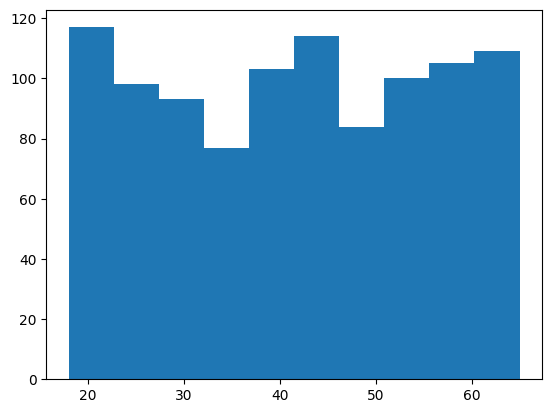

In [45]:
import matplotlib.pyplot as plt

plt.hist(df['age'])

<BarContainer object of 10 artists>

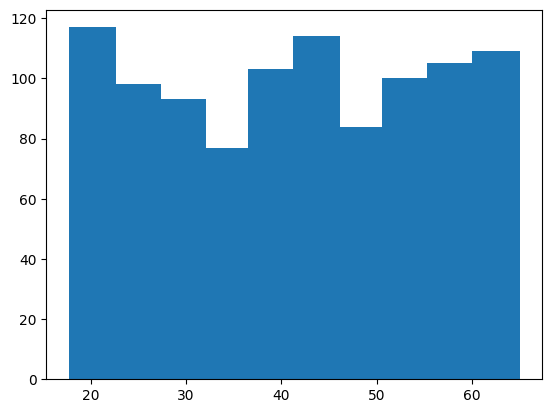

In [48]:
plt.bar(df_hist['breakpoint'] - 2.5, df_hist['count'], width=5)

In [ ]:
# df_hist = df['age'].hist()
# df_hist
# import matplotlib.pyplot as plt

# plt.hist(df['age'])
# plt.show()
# plt.bar(df_hist['breakpoint'] - 2.5, df_hist['count'], width=5)

<BarContainer object of 6 artists>

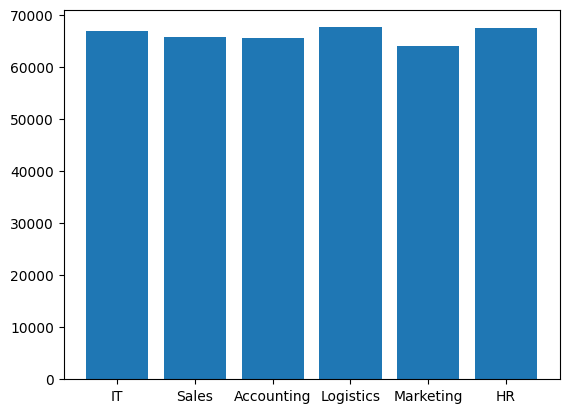

In [50]:
df_salary = df.group_by(pl.col('departments')).agg(pl.col('salary').mean())

plt.bar(df_salary['departments'], df_salary['salary'])

In [ ]:
# df_salary = df.group_by(pl.col('departments')).agg(pl.col('salary').mean())

# plt.bar(df_salary['departments'], df_salary['salary'])